# Plot figure 7.3

- Author: Matt Palmer
- Editor: Chris Smith
- Data: Norman Loeb

In [1]:
import numpy as np
import string
import matplotlib.pyplot as plt
import matplotlib

In [14]:
plt.rcParams['figure.figsize'] = (18/2.54, 18/2.54)
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.right'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.bottom'] = True

In [3]:
# This version should be Python3 compliant.. 

def read_textfile(datadir='../data_input/Loeb_et_al_2020/',
                  filename='Global_Net_Anomaly_Timeseries_12monthMean.txt', skip=1):
    f = open(datadir + filename, "r")
    lines = f.readlines()
    header = lines[skip-1]
    keys = header.split()
    f.close()
    ncols = len(lines[-1].split())  # Get number of columns from the last line..
    nrows = len(lines) - skip  # Get number of data lines in text file
    data = np.zeros([nrows, ncols])  # Convention of rows then columns for Numpy arrays (?)
    for jj in range(nrows):
        for ii in range(ncols):
            data[jj, ii] = float(lines[jj + skip].split()[ii])
    data_dict = dict.fromkeys(keys)
    for kk, key in enumerate(keys):
        data_dict[key] = data[:, kk]
    return data_dict

In [4]:
Net_dict = read_textfile()
SW_dict = read_textfile(filename='Global_SW_Anomaly_Timeseries_12monthMean.txt')
LW_dict = read_textfile(filename='Global_LW_Anomaly_Timeseries_12monthMean.txt')

# Include full model names as specified in Loeb et al (2020):
# https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2019GL086705
Net_dict['EC-Earth3-Veg'] = Net_dict['EC-Earth3'] 
SW_dict['EC-Earth3-Veg'] = SW_dict['EC-Earth3']
LW_dict['EC-Earth3-Veg'] = LW_dict['EC-Earth3']

Net_dict['ECHAM6.3'] = Net_dict['ECHAM'] 
SW_dict['ECHAM6.3'] = SW_dict['ECHAM']
LW_dict['ECHAM6.3'] = LW_dict['ECHAM']

Net_dict['GFDL-AM4'] = Net_dict['GFDL'] 
SW_dict['GFDL-AM4'] = SW_dict['GFDL']
LW_dict['GFDL-AM4'] = LW_dict['GFDL']

Net_dict['IPSL-CM6A'] = Net_dict['IPSL'] 
SW_dict['IPSL-CM6A'] = SW_dict['IPSL']
LW_dict['IPSL-CM6A'] = LW_dict['IPSL']

print(Net_dict.keys())

dict_keys(['yr', 'CERES', 'CESM2', 'CanESM5', 'EC-Earth3', 'ECHAM', 'GFDL', 'HadGEM3', 'IPSL', 'multimodel', 'EC-Earth3-Veg', 'ECHAM6.3', 'GFDL-AM4', 'IPSL-CM6A'])


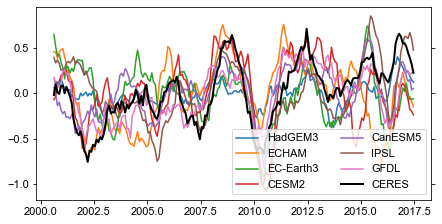

In [5]:
yr = Net_dict['yr']

for model in ['HadGEM3', 'ECHAM', 'EC-Earth3', 'CESM2', 'CanESM5','IPSL', 'GFDL']:
    plt.plot(yr, Net_dict[model], label=model)
plt.plot(yr, Net_dict['CERES'], label='CERES', color='k', linewidth=2.0)
plt.legend(ncol=2)
plt.show()

In [6]:
# Use the IPCC CMIP6 model colours from "~/Documents/IPCC/AR6/CMIP6_color.xlsx" where possible.. 

RGB_dict = {'CanESM5':np.array([30, 76, 36])/255.,
            'CESM2':np.array([67, 178, 216])/255., 
            'EC-Earth3-Veg':np.array([124, 99, 184])/255., 
            'ECHAM6.3':np.array([93, 161,162])/255., # Atmosphere for MPI model
            'GFDL-AM4':np.array([35, 54, 109])/255., 
            'HadGEM3':np.array([122, 139, 38])/255., 
            'IPSL-CM6A':np.array([91, 83, 174])/255.}


Saving file:  ../figures/fig7.3.png


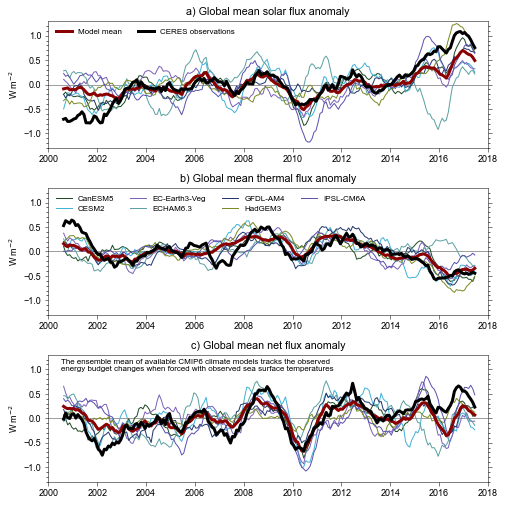

In [17]:
plotdir = '../figures/'
#plotfile = 'plot_AMIP_CERES_comparison_ModelMean_FGD.png'
plotfile = 'fig7.3.png'

c_obs = 'black' # Line color for CERES observations
c_mean = 'darkred' # Line color for multi-model mean
lw_model = 1.0 # Linewidth for individual CMIP models

text1 = """The ensemble mean of available CMIP6 climate models tracks the observed
energy budget changes when forced with observed sea surface temperatures"""

xmin, xmax = 2000., 2018
ymin, ymax = -1.3, 1.3

plt.figure(1)
f = plt.gcf()
#f.set_size_inches(6.,8.)
matplotlib.rcParams['font.size']=9
matplotlib.rcParams['axes.linewidth']=0.5 # set the value globally

yr = Net_dict['yr']
# In alphabetical order.. 
models = ['CanESM5','CESM2', 'EC-Earth3-Veg', 'ECHAM6.3', 'GFDL-AM4', 'HadGEM3', 'IPSL-CM6A']

# Panel A = SW radiation anomaly comparison
ax = plt.subplot(3, 1, 1)
plt.plot([xmin,xmax], [0., 0.], 'grey', linewidth=0.75) # Plot zero line
for model in models:
    color = RGB_dict[model]
    # Adopt Chapter 7 convention of +ve downwards 
    plt.plot(yr, -SW_dict[model], label=None, color=color, linewidth=lw_model)
plt.plot(yr, -SW_dict['multimodel'], label='Model mean', color=c_mean, linewidth=3.0)
plt.plot(yr, -SW_dict['CERES'], label='CERES observations', color=c_obs, linewidth=3.0)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
#ax.set_xticklabels('')
ax.yaxis.set_ticks_position('both')
ax.tick_params(width=0.5)
plt.ylabel('W m$^{-2}$')
#plt.title('a) Global mean reflected solar flux anomaly')
plt.title('a) Global mean solar flux anomaly')
plt.legend(loc='upper left', frameon=False, fontsize=8, ncol=4)


# Panel B = LW radiation anomaly comparison
ax = plt.subplot(3, 1, 2)
plt.plot([xmin,xmax], [0., 0.], 'grey', linewidth=0.75) # Plot zero line
for model in models:
    color = RGB_dict[model]
    # Adopt Chapter 7 convention of +ve downwards 
    plt.plot(yr, -LW_dict[model], label=model, color=color, linewidth=lw_model)
plt.plot(yr, -LW_dict['multimodel'], label=None, color=c_mean, linewidth=3.0)
plt.plot(yr, -LW_dict['CERES'], label=None, color=c_obs, linewidth=3.0)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
#ax.set_xticklabels('')
ax.yaxis.set_ticks_position('both')
ax.tick_params(width=0.5)
plt.ylabel('W m$^{-2}$')
#plt.title('b) Global mean emitted thermal flux anomaly')
plt.title('b) Global mean thermal flux anomaly')
plt.legend(loc='upper left', frameon=False, fontsize=8, ncol=4)
#plt.legend(loc='lower left', frameon=False, fontsize=8, ncol=4)

# Panel C = Net radiation anomaly comparison
ax = plt.subplot(3, 1, 3)
plt.plot([xmin,xmax], [0., 0.], 'grey', linewidth=0.75) # Plot zero line
for model in models:
    color = RGB_dict[model]
    plt.plot(yr, Net_dict[model], label=None, color=color, linewidth=lw_model)
plt.plot(yr, Net_dict['multimodel'], label=None, color=c_mean, linewidth=3.0)
plt.plot(yr, Net_dict['CERES'], label=None, color=c_obs, linewidth=3.0)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.text(2000.5, 1.22, text1, fontsize=8, va='top')
#plt.text(2000.5, 1.1, text2, fontsize=8)
#ax.set_xticklabels('')
ax.yaxis.set_ticks_position('both')
ax.tick_params(width=0.5)
plt.ylabel('W m$^{-2}$')
plt.title('c) Global mean net flux anomaly')
#plt.legend(loc='upper left', frameon=False, fontsize=8, ncol=4)
plt.tight_layout()
print("Saving file: ", plotdir+plotfile)
plt.savefig(plotdir+plotfile,dpi=300)
plt.savefig(plotdir+'fig7.3.pdf')